# __Обучение линейной регрессии на датасете цен домов__

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv('train_hw.csv')
test_df = pd.read_csv('test_hw.csv')

## **Разбиение датасета на тренировочную и валидационную части**

***
_Разобьём датасет на две части и будем оценивать качество модели на основании результатов на валидации_
***

In [3]:
train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [4]:
print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")

Train size: 934
Validation size: 234


## **EDA (Разведочный анализ данных)**

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
591,592,50,RL,60.0,10998,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,117000
184,185,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
743,744,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,145000
178,179,160,RL,24.0,2289,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,148500
597,598,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,COD,Abnorml,85400


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 591 to 1126
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             934 non-null    int64  
 1   MSSubClass     934 non-null    int64  
 2   MSZoning       934 non-null    object 
 3   LotFrontage    759 non-null    float64
 4   LotArea        934 non-null    int64  
 5   Street         934 non-null    object 
 6   Alley          55 non-null     object 
 7   LotShape       934 non-null    object 
 8   LandContour    934 non-null    object 
 9   Utilities      934 non-null    object 
 10  LotConfig      934 non-null    object 
 11  LandSlope      934 non-null    object 
 12  Neighborhood   934 non-null    object 
 13  Condition1     934 non-null    object 
 14  Condition2     934 non-null    object 
 15  BldgType       934 non-null    object 
 16  HouseStyle     934 non-null    object 
 17  OverallQual    934 non-null    int64  
 18  OverallCond 

In [7]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train_df.isna().sum().sort_values(ascending=False)

PoolQC           928
MiscFeature      900
Alley            879
Fence            765
MasVnrType       563
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,934.000000,934.000000,759.000000,934.000000,934.000000,934.000000,934.000000,934.000000,927.000000,934.000000,...,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,587.119914,56.868308,69.405797,10225.260171,6.102784,5.604925,1971.610278,1984.505353,101.263215,450.328694,...,92.723769,47.667024,21.190578,2.554604,16.765525,3.764454,36.460385,6.344754,2007.786938,179641.232334
std,339.617187,42.336816,23.658382,7862.182534,1.363328,1.068509,29.644665,20.590101,178.423017,469.775026,...,123.273869,67.741466,58.439405,22.193602,59.126399,47.339441,333.300257,2.706625,1.314688,76468.931188
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,288.250000,20.000000,59.500000,7508.750000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,593.500000,50.000000,69.000000,9356.500000,6.000000,5.000000,1973.000000,1992.000000,0.000000,389.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160500.000000
75%,878.750000,70.000000,80.000000,11494.500000,7.000000,6.000000,2000.750000,2004.000000,163.000000,730.250000,...,168.000000,68.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212675.000000
max,1168.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,...,857.000000,523.000000,330.000000,304.000000,440.000000,738.000000,8300.000000,12.000000,2010.000000,745000.000000


In [10]:
train_df[['SalePrice', 'YearBuilt']].describe()

,SalePrice,YearBuilt
count,934.000000,934.000000
mean,179641.232334,1971.610278
std,76468.931188,29.644665
min,34900.000000,1880.000000
25%,130000.000000,1954.000000
50%,160500.000000,1973.000000
75%,212675.000000,2000.750000
max,745000.000000,2009.000000


In [11]:
train_df['KitchenQual'].value_counts(normalize=True)

KitchenQual
TA    0.503212
Gd    0.399358
Ex    0.069593
Fa    0.027837
Name: proportion, dtype: float64

In [12]:
train_df.groupby('KitchenQual')['SalePrice'].mean()

KitchenQual
Ex    323410.969231
Fa    105970.884615
Gd    209508.139410
TA    140130.678723
Name: SalePrice, dtype: float64

***
_Видим, что качество кухни сильно влияет на цену дома_
***

In [13]:
train_df["Exterior2nd"] = train_df["Exterior2nd"].replace({"Brk Cmn": "BrkComm"})
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].where(train_df.GarageYrBlt <= 2010, train_df.YearBuilt)
train_df.rename(columns={
        "1stFlrSF": "FirstFlrSF",
        "2ndFlrSF": "SecondFlrSF",
        "3SsnPorch": "Threeseasonporch",
        }, inplace=True,)

In [14]:
val_df["Exterior2nd"] = val_df["Exterior2nd"].replace({"Brk Cmn": "BrkComm"})
val_df["GarageYrBlt"] = val_df["GarageYrBlt"].where(val_df.GarageYrBlt <= 2010, train_df.YearBuilt)
val_df.rename(columns={
        "1stFlrSF": "FirstFlrSF",
        "2ndFlrSF": "SecondFlrSF",
        "3SsnPorch": "Threeseasonporch",
        }, inplace=True,)

In [15]:
test_df["Exterior2nd"] = test_df["Exterior2nd"].replace({"Brk Cmn": "BrkComm"})
test_df["GarageYrBlt"] = test_df["GarageYrBlt"].where(test_df.GarageYrBlt <= 2010, train_df.YearBuilt)
test_df.rename(columns={
        "1stFlrSF": "FirstFlrSF",
        "2ndFlrSF": "SecondFlrSF",
        "3SsnPorch": "Threeseasonporch",
        }, inplace=True,)

In [16]:
cat_df = train_df.select_dtypes(include=['object'])
num_df = train_df.select_dtypes(exclude=['object'])

<Axes: xlabel='SalePrice', ylabel='Count'>

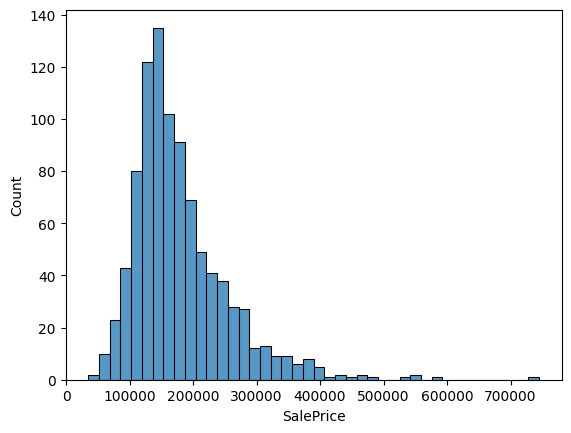

In [17]:
sns.histplot(train_df['SalePrice'])

***
_Видим, что распределение SalePrice имеет следующие особенности:_

_1) Сильная правосторонняя асимметрия — большинство значений сосредоточено в левой части графика (более низкие цены), а редкие высокие значения образуют длинный "хвост" вправо._

_2) Есть подозрение на выбросы (есть экстремально высокие значения)_

_Вывод: Распределение не нормальное, возможно потребуется логарифмическое (или какое-либо) преобразование для анализа._
***

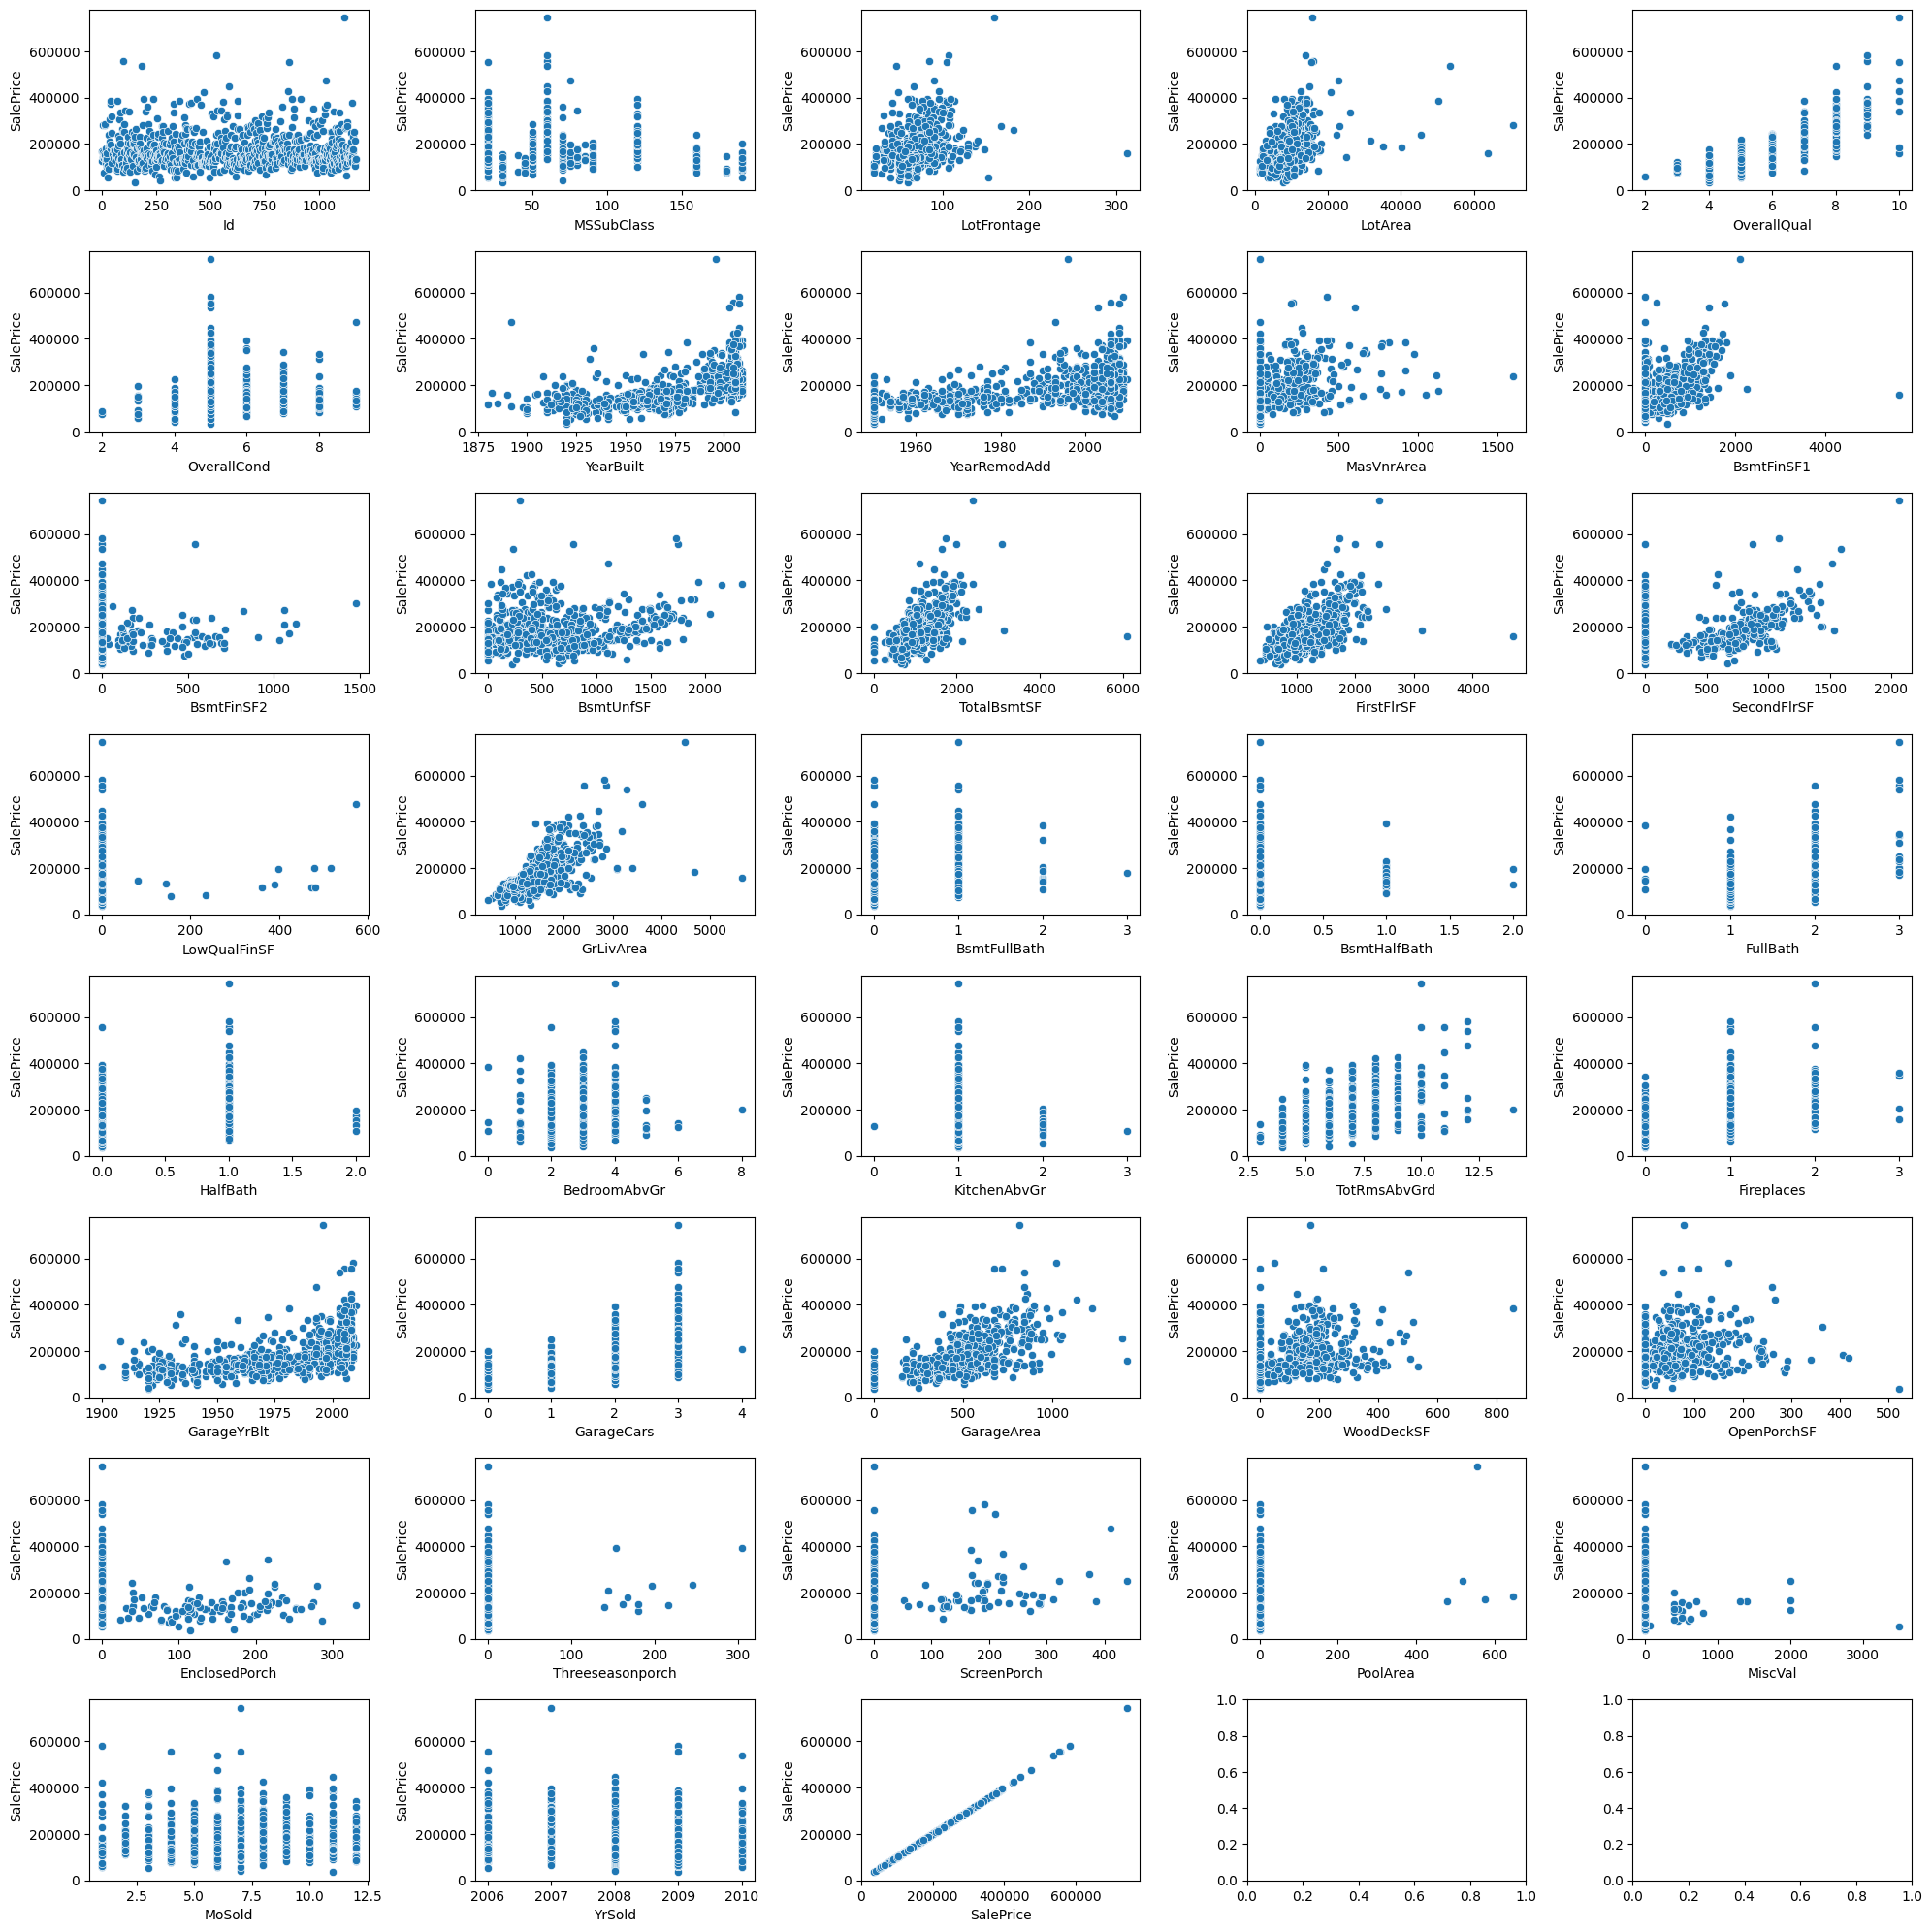

In [18]:
fig, axes = plt.subplots(8, 5, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='SalePrice',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

***
_На scatter plot'ах видим нечто похожее на экспененциальную зависимость от некоторых параметров (LotFrontage, LotArea, TotalBsmtSF и тд)_
***

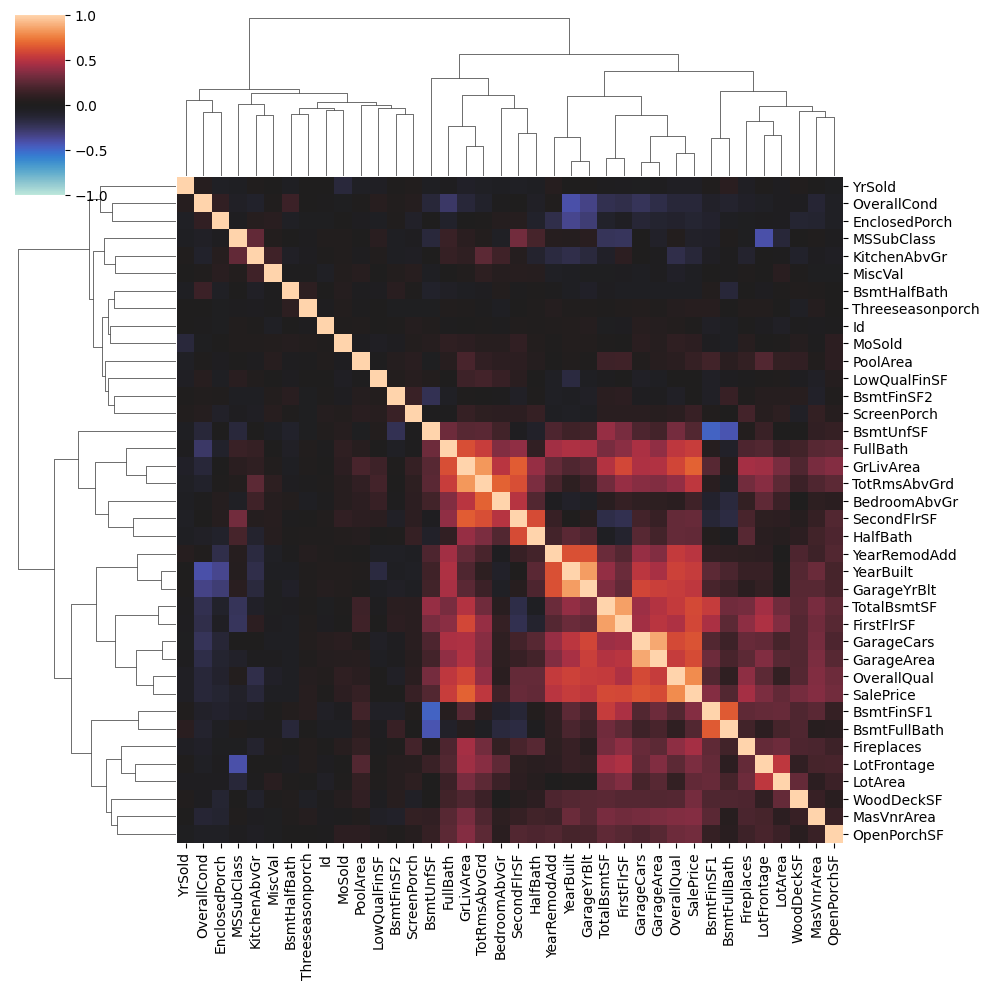

In [19]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )


corrplot(num_df, annot=None)

***
_Посмотрим, используя hue, на распределение цен в зависимости от самых важных (на первый взгляд) категориальных переменных_
***

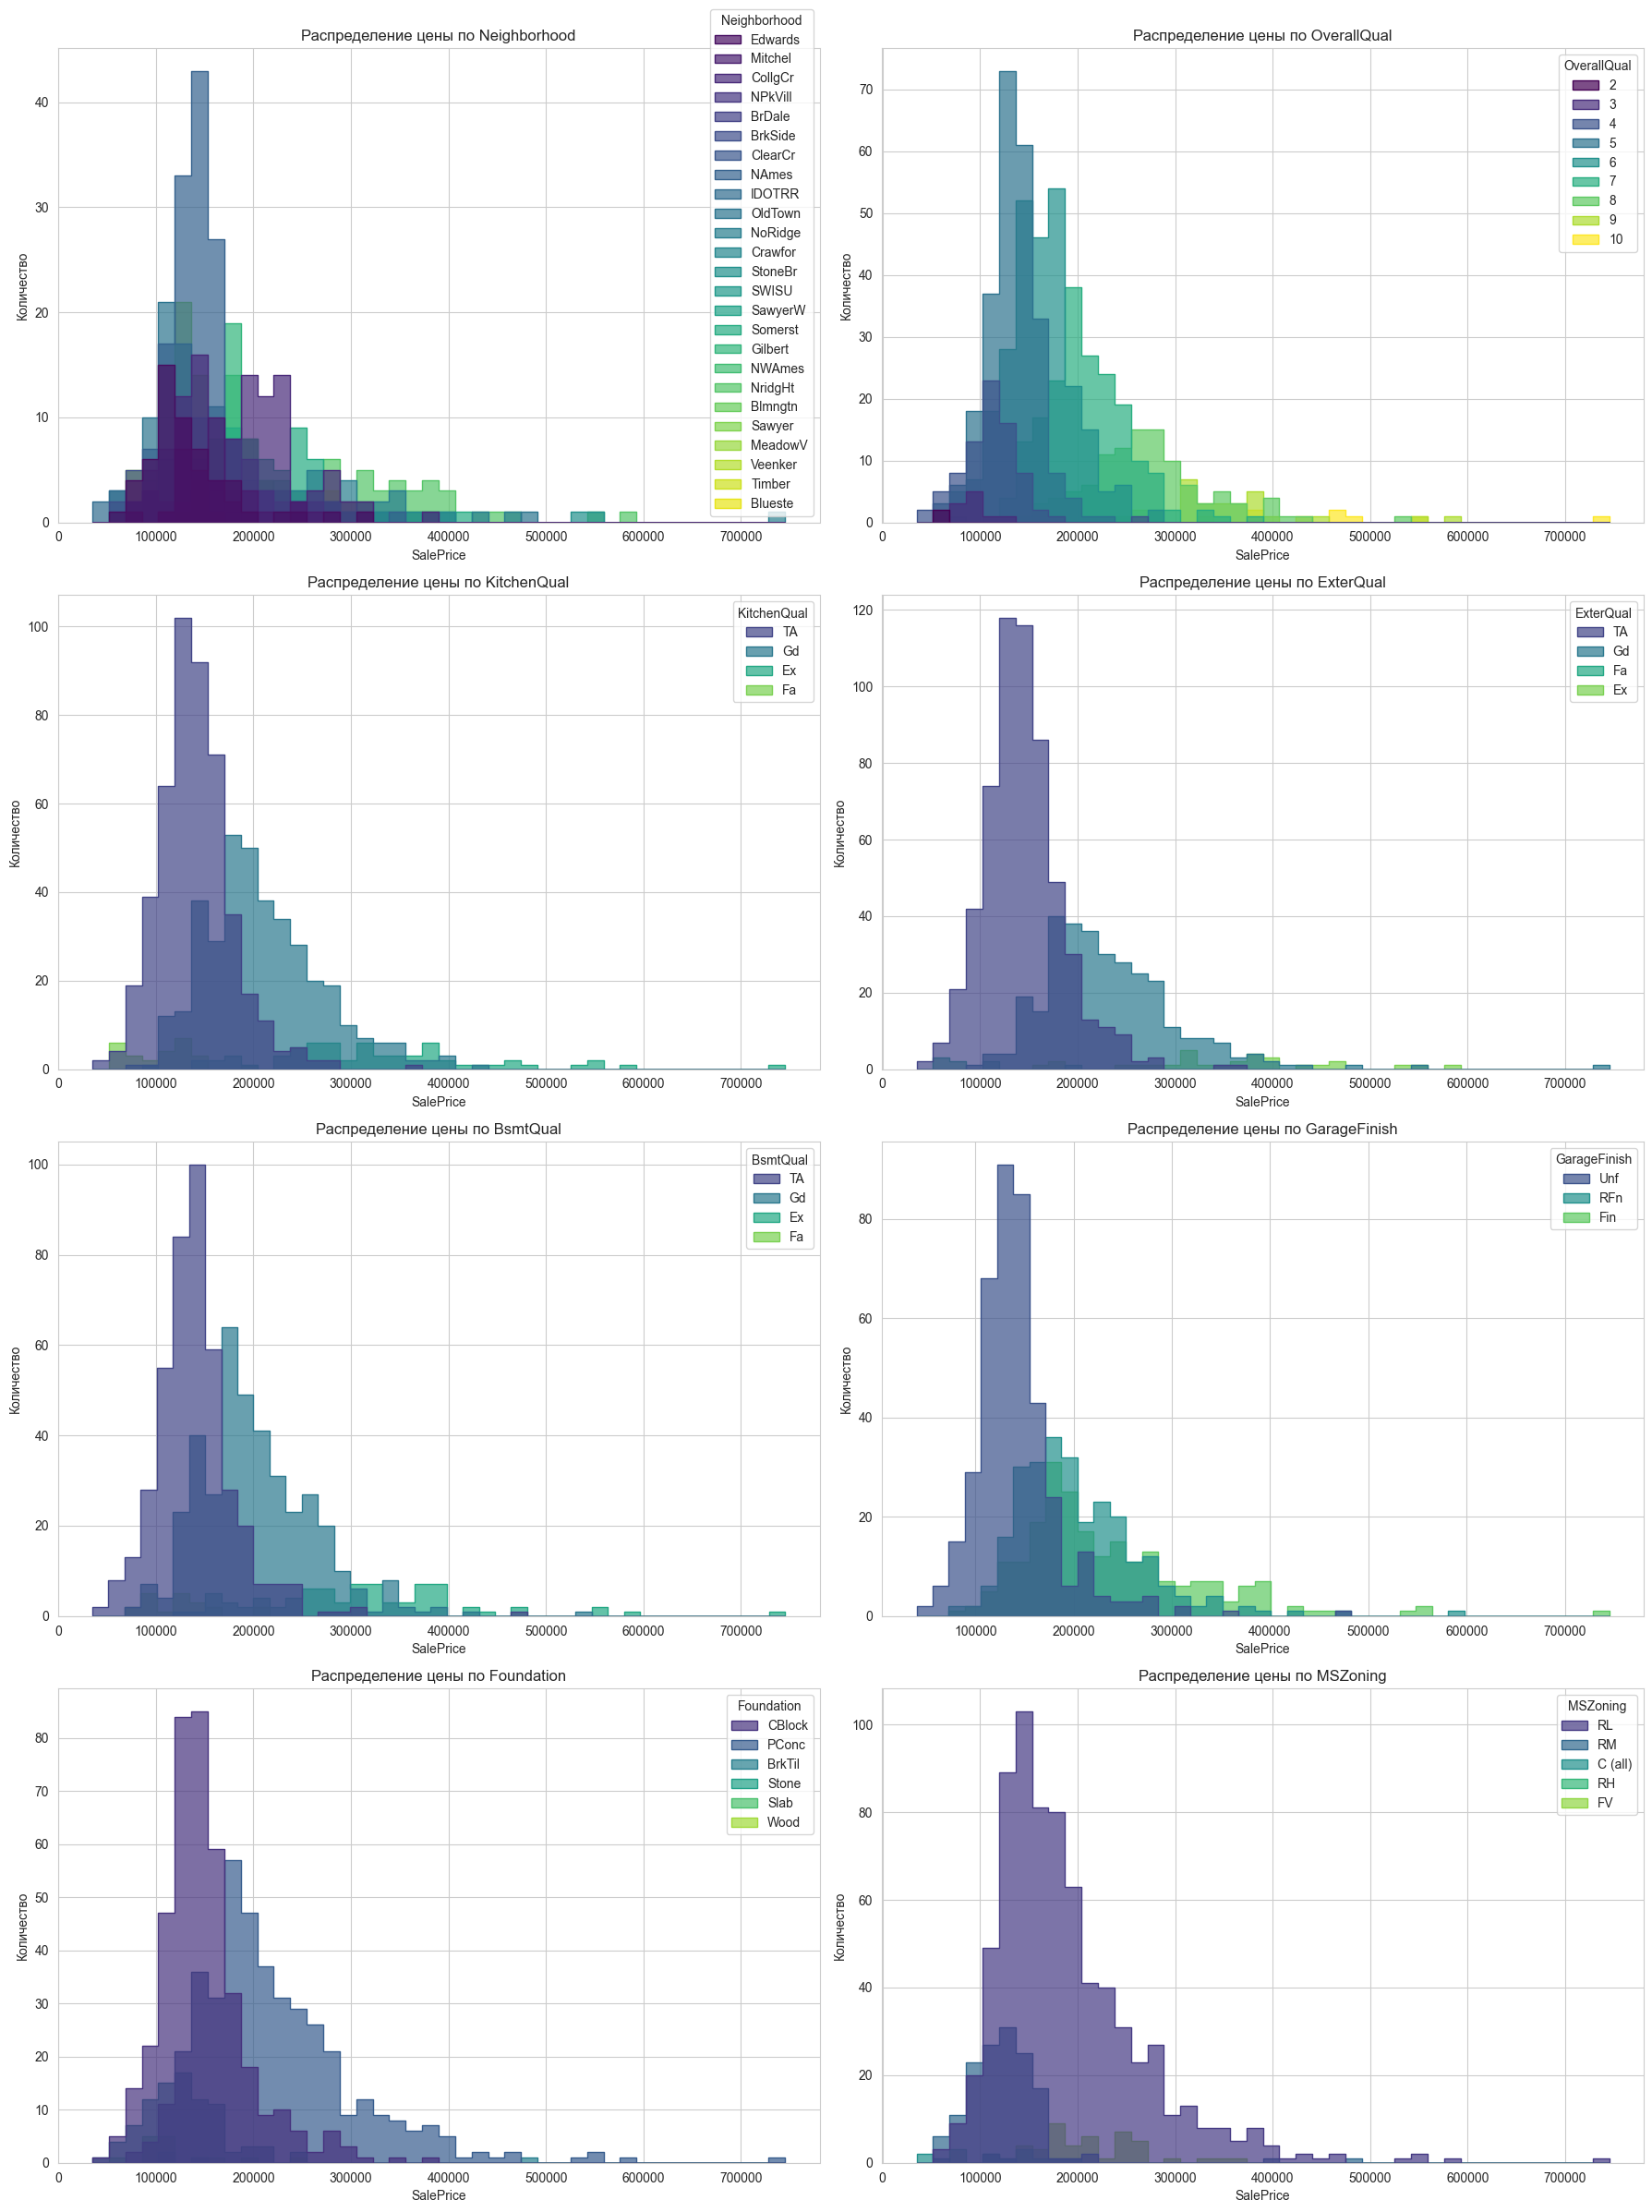

In [20]:
sns.set_style("whitegrid")

top_categorical = [
    'Neighborhood', # Район
    'OverallQual', # Общее Качество
    'KitchenQual', # Качество кухни
    'ExterQual', # Внешняя отделка
    'BsmtQual', # Качество подвала
    'GarageFinish', # Гараж
    'Foundation', # Фундамент
    'MSZoning' 
]
fig, axes = plt.subplots(4, 2, figsize=(18, 25))
axes = axes.flatten()
for i, feature in enumerate(top_categorical):
    ax = sns.histplot(
        data=train_df,
        x='SalePrice',
        hue=feature,
        element='step',
        palette='viridis',
        alpha=0.7,
        ax=axes[i]
    )
    ax.set_title(f'Распределение цены по {feature}', fontsize=12)
    ax.set_xlabel('SalePrice', fontsize=10)
    ax.set_ylabel('Количество', fontsize=10)
plt.tight_layout()

***
_А на pair plot'ах посмотрим на расклад дел у числовых признаков._
***

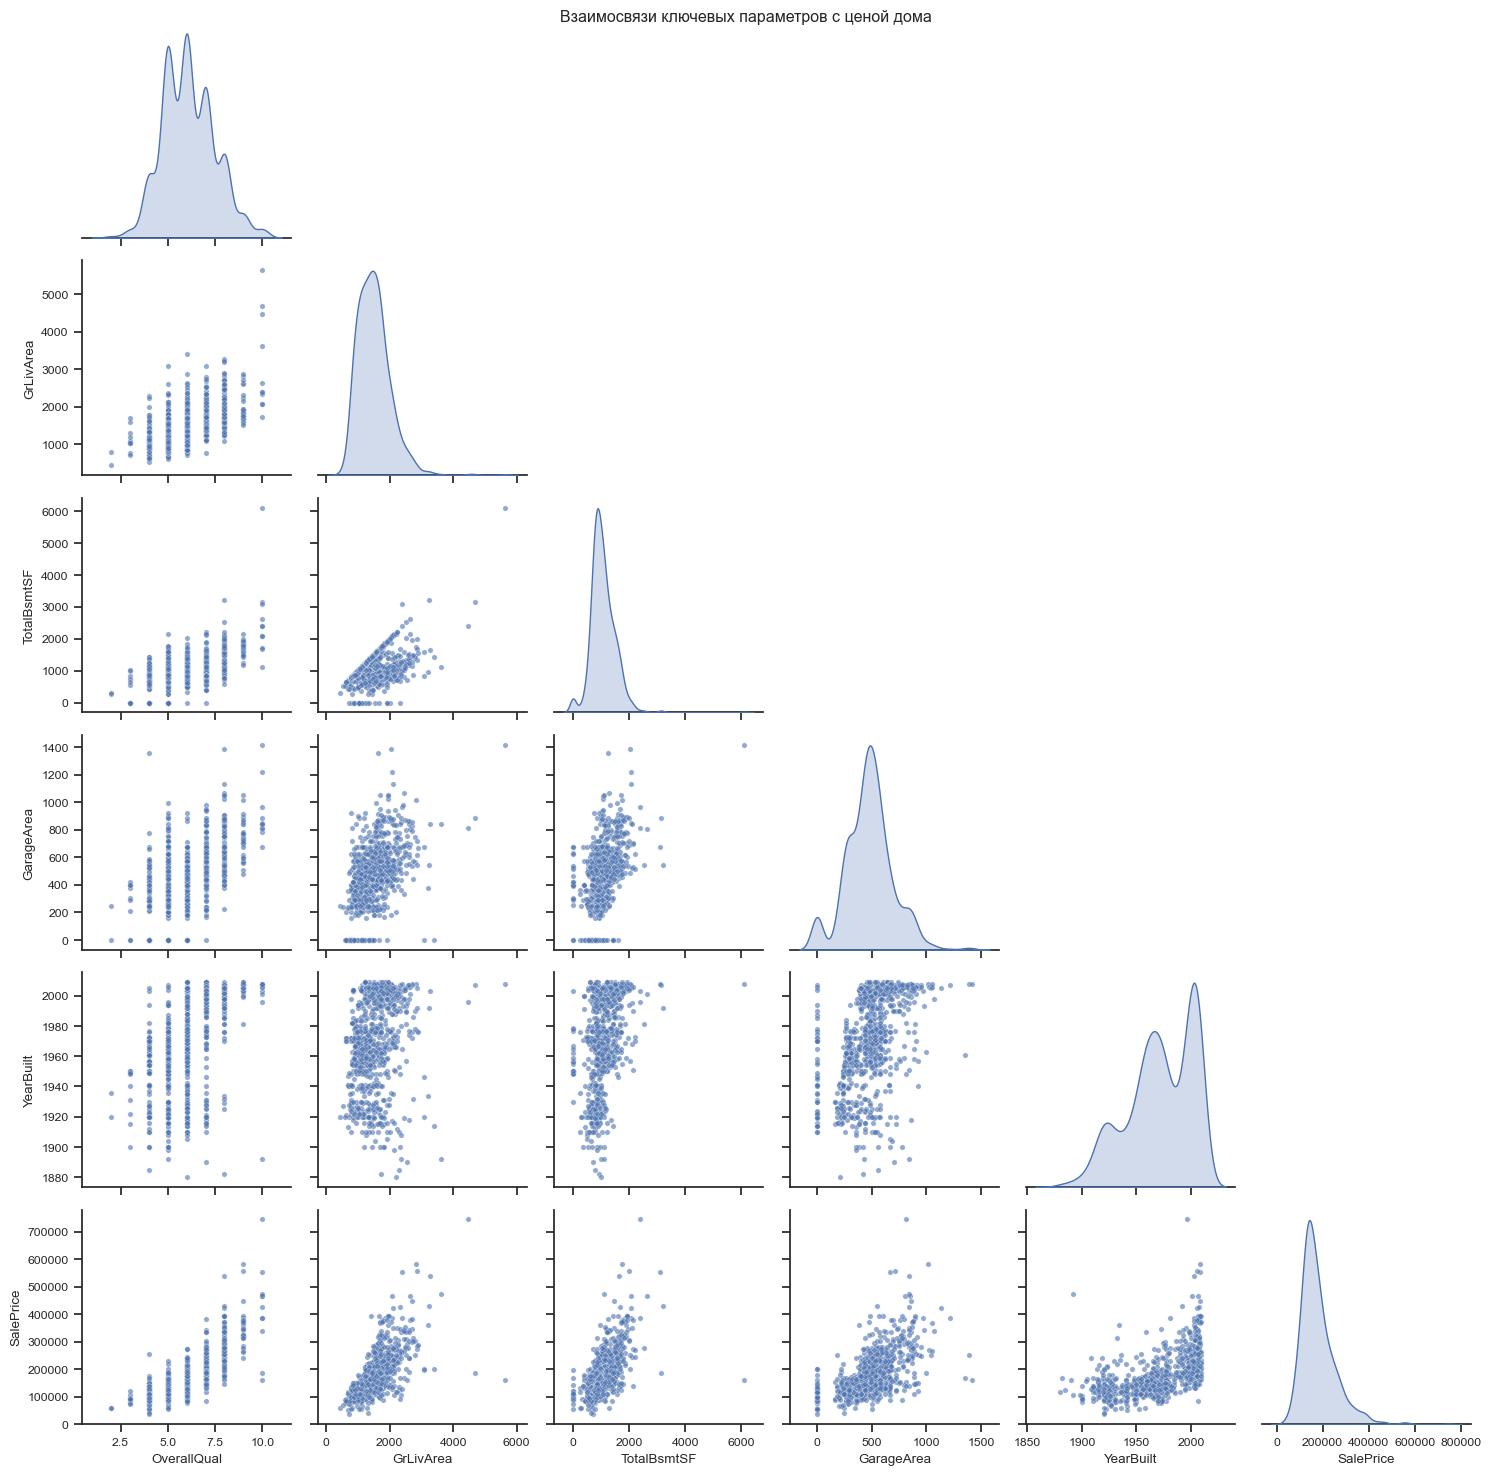

In [21]:
important_features = [
    'OverallQual',  # Общее качество
    'GrLivArea',    # Общая жилая площадь
    'TotalBsmtSF',  # Площадь подвала
    'GarageArea',   # Площадь гаража
    'YearBuilt',    # Год постройки
    'SalePrice'
]

sns.set(style='ticks', font_scale=0.8)
g = sns.pairplot(
    data=train_df[important_features],
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 15},
    diag_kws={'fill': True},
    corner=True
)

plt.suptitle('Взаимосвязи ключевых параметров с ценой дома')

plt.tight_layout()

## **Борьба с мультиколлинеарностью**

***
_На тепловой карте мы увидели, что некоторые признаки слишком коррелируют между собой. Для модели линейной регрессии это нежелательно, поэтому избавимся, где необходимо, от гиперкорреляции_
***

In [22]:
def find_highly_correlated_features(df, threshold=0.75):
    corr_matrix = df.select_dtypes(include=[np.number]).corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    high_corr = upper.stack().reset_index()
    high_corr.columns = ['Feature1', 'Feature2', 'Correlation']
    high_corr = high_corr[high_corr['Correlation'] > threshold]
    
    return high_corr.sort_values(by='Correlation', ascending=False)

high_corr_pairs = find_highly_correlated_features(train_df, threshold=0.8)
print("Самые сильно коррелирующие пары признаков:")
print(high_corr_pairs.head(10))

Самые сильно коррелирующие пары признаков:
        Feature1      Feature2  Correlation
637   GarageCars    GarageArea     0.869180
378  TotalBsmtSF    FirstFlrSF     0.845236
225    YearBuilt   GarageYrBlt     0.840996
478    GrLivArea  TotRmsAbvGrd     0.825831


In [23]:
train_df.drop(
    ['GarageYrBlt','TotRmsAbvGrd','FirstFlrSF','GarageCars'],
    axis=1,
    inplace=True
)

In [24]:
val_df.drop(
    ['GarageYrBlt','TotRmsAbvGrd','FirstFlrSF','GarageCars'],
    axis=1,
    inplace=True
)

In [25]:
test_df.drop(
    ['GarageYrBlt','TotRmsAbvGrd','FirstFlrSF','GarageCars'],
    axis=1,
    inplace=True
)

## **Борьба с пропусками**

In [26]:
nan_df = (train_df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(15)

,column_name,percentage
68,PoolQC,99.357602
70,MiscFeature,96.359743
6,Alley,94.111349
69,Fence,81.905782
25,MasVnrType,60.278373
55,FireplaceQu,46.573876
3,LotFrontage,18.736617
56,GarageType,5.139186
57,GarageFinish,5.139186
60,GarageCond,5.139186


In [27]:
intro_srt = "Number of columns with more than"
for percent in (80, 50, 20, 5):
    print(f"{intro_srt} {percent}% NANs: {(nan_df.percentage > percent).sum()}")

Number of columns with more than 80% NANs: 4
Number of columns with more than 50% NANs: 5
Number of columns with more than 20% NANs: 6
Number of columns with more than 5% NANs: 11


***
_Удалим признаки с процентом nan'ов больше 80-ти_
***

In [28]:
nan_columns = list(nan_df[nan_df.percentage > 80]['column_name'])
nan_columns

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [29]:
train_df.drop(
    ['PoolQC','MiscFeature','Alley','Fence'],
    axis=1,
    inplace=True
)

In [30]:
val_df.drop(
    ['PoolQC','MiscFeature','Alley','Fence'],
    axis=1,
    inplace=True
)

In [31]:
test_df.drop(
    ['PoolQC','MiscFeature','Alley','Fence'],
    axis=1,
    inplace=True
)

***
_А далее рассмотрим отдельно числовые и категориальные признаки._
***

In [32]:
cat_df = train_df.select_dtypes(include=['object'])
num_df = train_df.select_dtypes(exclude=['object'])

In [33]:
num_cols_with_missing = [col for col in num_df.columns 
                         if num_df[col].isnull().any()]
num_cols_with_missing

['LotFrontage', 'MasVnrArea']

***
_Заполним средним в соответствии с зависимостью по районам._
***

In [34]:
lotfrontage_means = train_df.groupby('Neighborhood')['LotFrontage'].mean()
masvnrarea_means = train_df.groupby('Neighborhood')['MasVnrArea'].mean()

In [35]:
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
train_df['MasVnrArea'] = train_df.groupby('Neighborhood')['MasVnrArea'].transform(lambda x: x.fillna(x.mean()))

In [36]:
val_df['LotFrontage'] = val_df['LotFrontage'].fillna(
    val_df['Neighborhood'].map(lotfrontage_means).fillna(train_df['LotFrontage'].mean())
)
val_df['MasVnrArea'] = val_df['MasVnrArea'].fillna(
    val_df['Neighborhood'].map(masvnrarea_means).fillna(train_df['MasVnrArea'].mean())
)

In [37]:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(
    test_df['Neighborhood'].map(lotfrontage_means).fillna(train_df['LotFrontage'].mean())
)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(
    test_df['Neighborhood'].map(masvnrarea_means).fillna(train_df['MasVnrArea'].mean())
)

***
_Категориальные заполним модой._
***

In [38]:
cat_cols_with_missing = [col for col in cat_df.columns 
                         if train_df[col].isnull().any()]

In [39]:
cat_modes = train_df[cat_cols_with_missing].mode().iloc[0]

In [40]:
train_df[cat_cols_with_missing] = train_df[cat_cols_with_missing].fillna(cat_modes)
val_df[cat_cols_with_missing] = val_df[cat_cols_with_missing].fillna(cat_modes)
test_df[cat_cols_with_missing] = test_df[cat_cols_with_missing].fillna(cat_modes)

In [41]:
print(train_df.isna().sum().sort_values(ascending=False))
print(val_df.isna().sum().sort_values(ascending=False))
print(test_df.isna().sum().sort_values(ascending=False))

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 73, dtype: int64
Electrical       1
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 73, dtype: int64
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 72, dtype: int64


In [42]:
mode_electrical = train_df['Electrical'].mode()[0]
val_df['Electrical'] = val_df['Electrical'].fillna(mode_electrical)

***
_Окончательная проверка:_
***

In [43]:
print("Есть ли пропуски в train_df:", train_df.isna().any().any())
print("Есть ли пропуски в val_df:", val_df.isna().any().any())
print("Есть ли пропуски в test_df:", test_df.isna().any().any())

Есть ли пропуски в train_df: False
Есть ли пропуски в val_df: False
Есть ли пропуски в test_df: False


## **Борьба со слабой вариантивностью**

***
_Удалим признаки с маленькой дисперсией (так как они практически не несут информации для предсказания целевой переменной)._
***

In [44]:
def get_almost_constant_columns(df, dropna=True):
    cols = []
    for i in df:
        if dropna:
            counts = df[i].dropna().value_counts()
        else:
            counts = df[i].value_counts()
        most_popular_value_count = counts.iloc[0]
        if (most_popular_value_count / len(df)) * 100 > 96:
            cols.append(i)
    return cols

In [45]:
cat_df = train_df.select_dtypes(include=['object'])
overfit_cat = get_almost_constant_columns(cat_df)
train_df = train_df.drop(overfit_cat, axis=1)
overfit_cat

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'GarageCond']

In [46]:
num_df = train_df.select_dtypes(exclude=['object'])
overfit_num = get_almost_constant_columns(num_df, dropna=True)
train_df = train_df.drop(overfit_num, axis=1)
overfit_num

['LowQualFinSF', 'Threeseasonporch', 'PoolArea', 'MiscVal']

In [47]:
val_df = val_df.drop(overfit_cat, axis=1)
val_df = val_df.drop(overfit_num, axis=1)

In [48]:
test_df = test_df.drop(overfit_cat, axis=1)
test_df = test_df.drop(overfit_num, axis=1)

## **Борьба с выбросами**

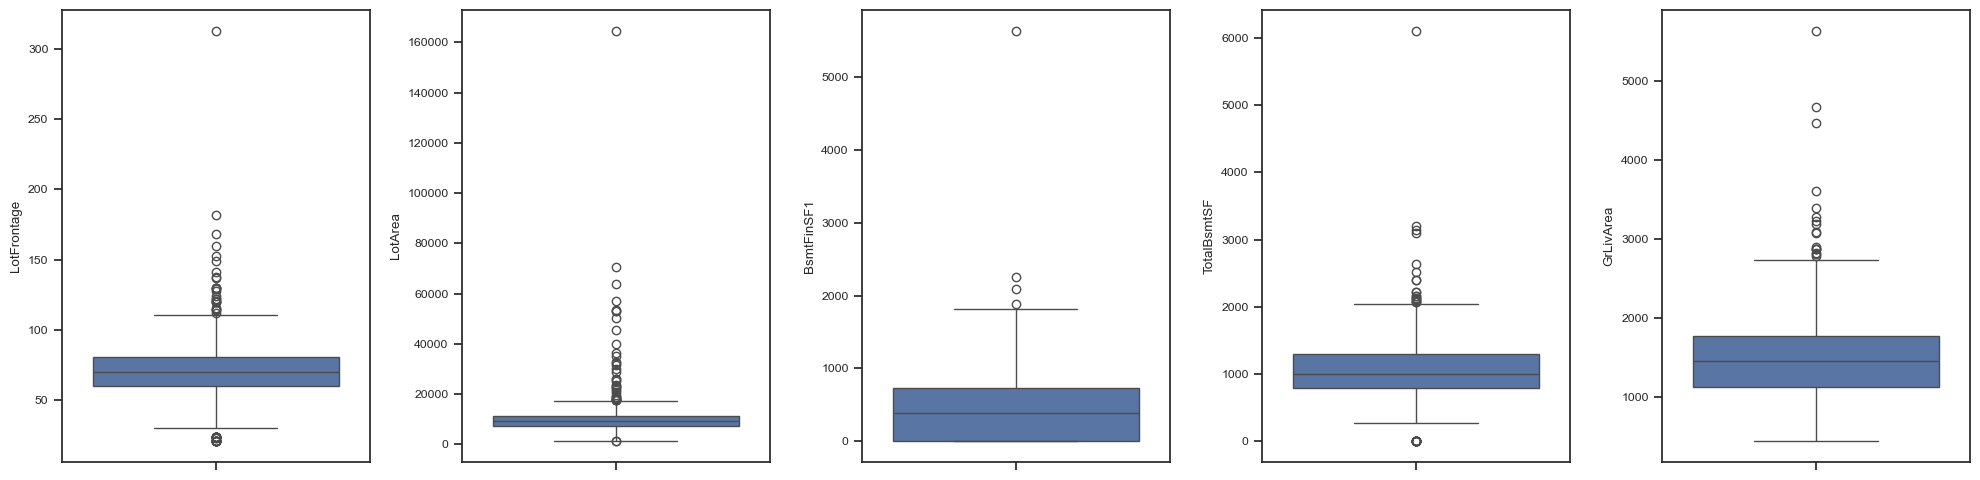

In [49]:
out_col = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea']

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=train_df[col], data=train_df, ax=ax)
fig.tight_layout(pad=1.5)

***
_Визульально оценим оптимальные границы для выбросов._
***

In [50]:
for col, upper_bound in (
    ('LotFrontage', 200),
    ('LotArea', 100000),
    ('BsmtFinSF1', 4000),
    ('TotalBsmtSF', 5000),
    ('GrLivArea', 4000),
):
    median_val = train_df[col].median()
    train_df = train_df.drop(train_df[train_df[col] > upper_bound].index)
    val_df = val_df.drop(val_df[val_df[col] > upper_bound].index)

***
_Проверим изменения на ящиках с усами._
***

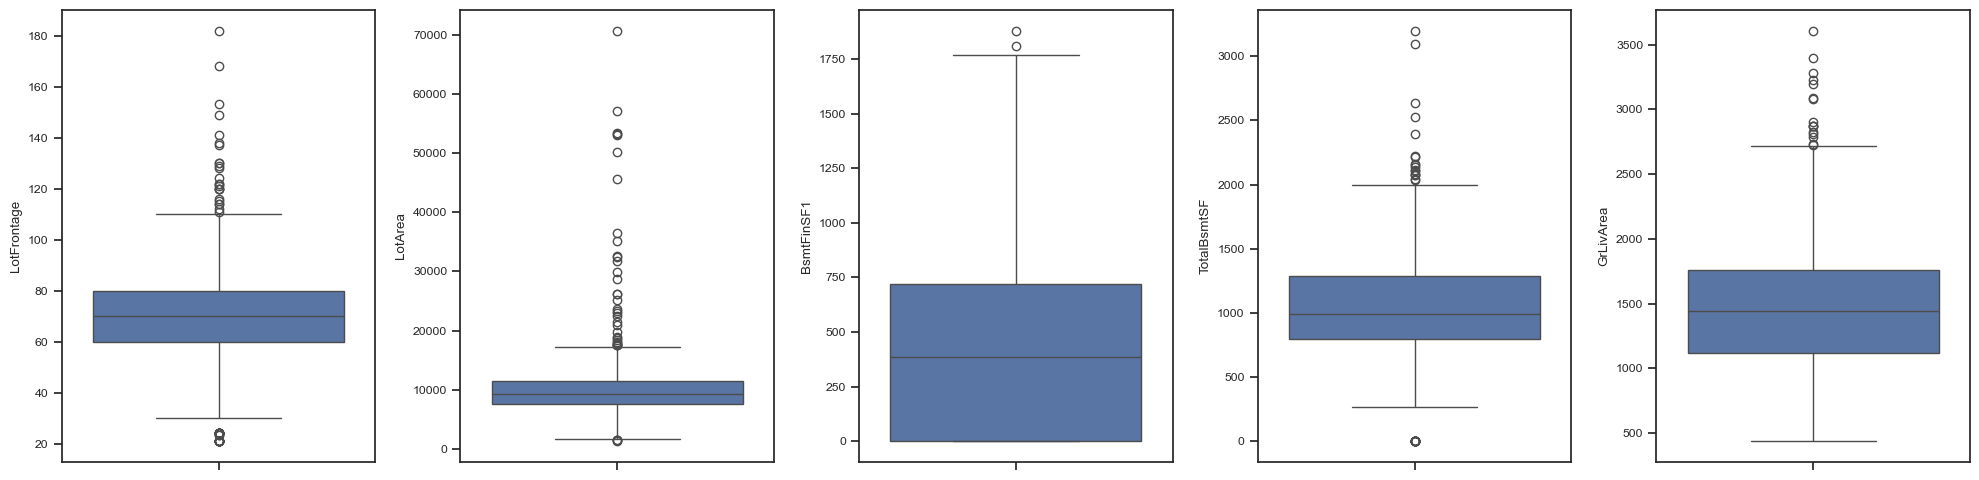

In [51]:
out_col = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea']

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=train_df[col], data=train_df, ax=ax)
fig.tight_layout(pad=1.5)

## **Feature Engineering**

***
_Создадим несколько новых осмысленных признаков._
***

In [52]:
train_df['MSSubClass'] = train_df['MSSubClass'].apply(str)
val_df['MSSubClass'] = val_df['MSSubClass'].apply(str)
test_df['MSSubClass'] = test_df['MSSubClass'].apply(str)

In [53]:
train_df['TotalLot'] = train_df['LotFrontage'] + train_df['LotArea']
train_df['TotalBsmtFin'] = train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['SecondFlrSF']
train_df['TotalBath'] = train_df['FullBath'] + train_df['HalfBath']
train_df['TotalPorch'] = train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['ScreenPorch']

In [54]:
val_df['TotalLot'] = val_df['LotFrontage'] + val_df['LotArea']
val_df['TotalBsmtFin'] = val_df['BsmtFinSF1'] + val_df['BsmtFinSF2']
val_df['TotalSF'] = val_df['TotalBsmtSF'] + val_df['SecondFlrSF']
val_df['TotalBath'] = val_df['FullBath'] + val_df['HalfBath']
val_df['TotalPorch'] = val_df['OpenPorchSF'] + val_df['EnclosedPorch'] + val_df['ScreenPorch']

In [55]:
test_df['TotalLot'] = test_df['LotFrontage'] + test_df['LotArea']
test_df['TotalBsmtFin'] = test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['SecondFlrSF']
test_df['TotalBath'] = test_df['FullBath'] + test_df['HalfBath']
test_df['TotalPorch'] = test_df['OpenPorchSF'] + test_df['EnclosedPorch'] + test_df['ScreenPorch']

In [56]:
train_df["LivLotRatio"] = train_df["GrLivArea"] / train_df["LotArea"]
val_df["LivLotRatio"] = val_df["GrLivArea"] / val_df["LotArea"]
test_df["LivLotRatio"] = test_df["GrLivArea"] / test_df["LotArea"]

## **Скейлинг и нормализация**

In [57]:
'''
...........................................
'''

'\n...........................................\n'

## **Кодирование категориальных переменных**

***
_Порядковые признаки закодируем вручную по собственным map'ам._
***

In [58]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

In [59]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual', 'FireplaceQu']
for col in ord_col:
    train_df[col] = train_df[col].map(ordinal_map)
    val_df[col] = val_df[col].map(ordinal_map)
    test_df[col] = test_df[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    train_df[col] = train_df[col].map(fintype_map)
    val_df[col] = val_df[col].map(fintype_map)
    test_df[col] = test_df[col].map(fintype_map)

train_df['BsmtExposure'] = train_df['BsmtExposure'].map(expose_map)
val_df['BsmtExposure'] = val_df['BsmtExposure'].map(expose_map)
test_df['BsmtExposure'] = test_df['BsmtExposure'].map(expose_map)

***
_Остальные признаки (в которых нет отношений порядка между категориями) закодируем так:_
1) _Target Encoder'ом те, которые непосредственно влияют на SalePrice (см. EDA графики с hue)_
2) _Оставшиеся - OneHot Encoder'ом_
***

In [60]:
train_df.select_dtypes(include=["object"]).columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [61]:
train_df.select_dtypes(include=["number"]).columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'SecondFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice',
       'TotalLot', 'TotalBsmtFin', 'TotalSF', 'TotalBath', 'TotalPorch',
       'LivLotRatio'],
      dtype='object')

In [62]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder

def prepare_data(df):
    """Приведение категориальных признаков к строковому типу"""
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = df[col].astype(str)
    return df

train_df = prepare_data(train_df)
val_df = prepare_data(val_df)
test_df = prepare_data(test_df)

onehot_features = [
    'CentralAir', 'LandContour', 'LotConfig', 'Condition1', 'BldgType', 
    'HouseStyle', 'RoofStyle', 'PavedDrive', 'MasVnrType', 'Foundation', 
    'SaleType', 'SaleCondition', 'LandSlope', 'LotShape', 'MSSubClass', 
    'Electrical', 'Functional', 'GarageFinish'
]
target_encode_features = ['Neighborhood',  # Район (сильно влияет на цену)
    'MSZoning',      # Зонирование
    'Exterior1st',   # Материал отделки
    'Exterior2nd',
    'GarageType'     # Тип гараж
]
numeric_features = [col for col in train_df.select_dtypes(include=np.number).columns 
                   if col != 'SalePrice']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_features),
        ('target', TargetEncoder(), target_encode_features),
        ('numeric', 'passthrough', numeric_features)
    ],
    remainder='drop'
)

X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']
X_val = val_df.drop('SalePrice', axis=1)
y_val = val_df['SalePrice']
X_test = test_df.copy()

X_train_encoded = preprocessor.fit_transform(X_train, y_train)
    
X_val_encoded = preprocessor.transform(X_val)
X_test_encoded = preprocessor.transform(X_test)
    
feature_names = []
if onehot_features:
    feature_names.extend(preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_features))
feature_names.extend(target_encode_features)
feature_names.extend(numeric_features)
    
train_df = pd.DataFrame(X_train_encoded, columns=feature_names)
val_df = pd.DataFrame(X_val_encoded, columns=feature_names)
test_df = pd.DataFrame(X_test_encoded, columns=feature_names)
    
train_df['SalePrice'] = y_train.values
val_df['SalePrice'] = y_val.values
    
print("Успешное преобразование всех датасетов!")
print(f"Форма train: {train_df.shape}")
print(f"Форма val: {val_df.shape}")
print(f"Форма test: {test_df.shape}")
print("\nПример первых 5 строк train:")
print(train_df.head())

Успешное преобразование всех датасетов!
Форма train: (930, 153)
Форма val: (233, 153)
Форма test: (292, 152)

Пример первых 5 строк train:
   CentralAir_N  CentralAir_Y  LandContour_Bnk  LandContour_HLS  \
0           0.0           1.0              0.0              0.0   
1           0.0           1.0              0.0              0.0   
2           0.0           1.0              0.0              0.0   
3           0.0           1.0              0.0              0.0   
4           0.0           1.0              0.0              0.0   

   LandContour_Low  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  \
0              0.0              1.0               0.0                0.0   
1              0.0              1.0               0.0                0.0   
2              0.0              1.0               0.0                0.0   
3              0.0              1.0               0.0                0.0   
4              0.0              1.0               0.0                0.0   

 

## **Обучение линейной регрессии**

***
_Подготовка данных._
***

In [63]:
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']
    
X_val = val_df.drop('SalePrice', axis=1)
y_val = val_df['SalePrice']
    
X_test = test_df.copy()

***
_Расчёт метрик._
***

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

def calculate_metrics(y_true, y_pred, prefix=""):
    y_pred_pos = np.maximum(y_pred, 0)
    
    metrics = {
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred),
        'MSLE': mean_squared_log_error(y_true, y_pred_pos)
    }
    
    if prefix:
        metrics = {f"{prefix}_{k}": v for k, v in metrics.items()}
    return metrics

***
_Классическая линейная регрессия._
***

In [65]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
train_metrics = calculate_metrics(y_train, train_pred, "Train")
print("=== Train Metrics ===")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.5f}")

val_pred = model.predict(X_val)
val_metrics = calculate_metrics(y_val, val_pred, "Val")
print("\n=== Validation Metrics ===")
for metric, value in val_metrics.items():
    print(f"{metric}: {value:.5f}")

test_pred = model.predict(X_test)

=== Train Metrics ===
Train_MSE: 491461482.31595
Train_RMSE: 22168.93056
Train_MAE: 15833.04065
Train_R2: 0.91095
Train_MSLE: 0.01974

=== Validation Metrics ===
Val_MSE: 755569416.62762
Val_RMSE: 27487.62297
Val_MAE: 18970.13229
Val_R2: 0.89529
Val_MSLE: 0.60089


***
_Результаты достаточно хороши, однако попробуем прологарифмировать целевую переменную перед обучением._
***

In [66]:
y_train_log = np.log1p(y_train)

model.fit(X_train, y_train_log)

train_pred = np.expm1(model.predict(X_train))
train_metrics = calculate_metrics(y_train, train_pred, "Train")
print("=== Train Metrics ===")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.5f}")

val_pred = np.expm1(model.predict(X_val))
val_metrics = calculate_metrics(y_val, val_pred, "Val")
print("\n=== Validation Metrics ===")
for metric, value in val_metrics.items():
    print(f"{metric}: {value:.5f}")

test_pred_log = model.predict(X_test)
test_pred = np.expm1(test_pred_log)

=== Train Metrics ===
Train_MSE: 353679244.11908
Train_RMSE: 18806.36180
Train_MAE: 12505.38245
Train_R2: 0.93592
Train_MSLE: 0.01062

=== Validation Metrics ===
Val_MSE: 475211973.57369
Val_RMSE: 21799.35718
Val_MAE: 14598.05821
Val_R2: 0.93414
Val_MSLE: 0.01520


***
_Показатели практически всех метрик заметно улучшились (в том числе и msle, что самое главное). Однако сохраняется заметная разница между значениями на валидации и на трейне, что указывает на некоторую переобученность модели. Поэтому добавим регуляризации (и подберём для них подходящие коэффициенты)._
***

***
_L2-регуляризация:_
***

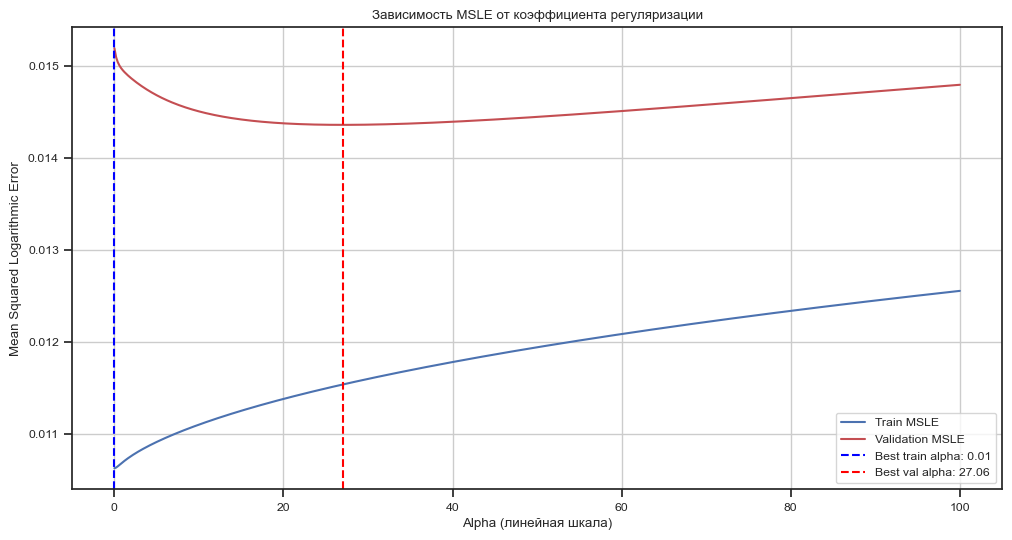

Лучший alpha по train: 0.0100, MSLE: 0.010624
Лучший alpha по val: 27.0614, MSLE: 0.014358


In [67]:
from sklearn.linear_model import Ridge
alphas = np.linspace(0.01, 100, 500)

train_msle = []
val_msle = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, np.log1p(y_train))
    
    y_train_pred = np.maximum(np.expm1(model.predict(X_train)), 0)
    y_val_pred = np.maximum(np.expm1(model.predict(X_val)), 0)
    
    train_msle.append(mean_squared_log_error(y_train, y_train_pred))
    val_msle.append(mean_squared_log_error(y_val, y_val_pred))

best_alpha_train = alphas[np.argmin(train_msle)]
best_alpha_val = alphas[np.argmin(val_msle)]

plt.figure(figsize=(12, 6))
plt.plot(alphas, train_msle, 'b-', label='Train MSLE')
plt.plot(alphas, val_msle, 'r-', label='Validation MSLE')
plt.axvline(best_alpha_train, color='blue', linestyle='--', 
            label=f'Best train alpha: {best_alpha_train:.2f}')
plt.axvline(best_alpha_val, color='red', linestyle='--', 
            label=f'Best val alpha: {best_alpha_val:.2f}')

plt.xlabel('Alpha (линейная шкала)')
plt.ylabel('Mean Squared Logarithmic Error')
plt.title('Зависимость MSLE от коэффициента регуляризации')
plt.legend()
plt.grid(True)
plt.show()

print(f"Лучший alpha по train: {best_alpha_train:.4f}, MSLE: {min(train_msle):.6f}")
print(f"Лучший alpha по val: {best_alpha_val:.4f}, MSLE: {min(val_msle):.6f}")


In [68]:
y_train_log = np.log1p(y_train)

model = Ridge(alpha=best_alpha_val)
model.fit(X_train, y_train_log)

train_pred = np.expm1(model.predict(X_train))
train_metrics = calculate_metrics(y_train, train_pred, "Train")
print("=== Train Metrics ===")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.5f}")

val_pred = np.expm1(model.predict(X_val))
val_metrics = calculate_metrics(y_val, val_pred, "Val")
print("\n=== Validation Metrics ===")
for metric, value in val_metrics.items():
    print(f"{metric}: {value:.5f}")

test_pred_log = model.predict(X_test)
test_pred = np.expm1(test_pred_log)

=== Train Metrics ===
Train_MSE: 381189786.23615
Train_RMSE: 19524.08221
Train_MAE: 12985.52296
Train_R2: 0.93093
Train_MSLE: 0.01154

=== Validation Metrics ===
Val_MSE: 477386543.63058
Val_RMSE: 21849.17718
Val_MAE: 14401.34690
Val_R2: 0.93384
Val_MSLE: 0.01436


***
_Благодаря регуляризации результаты на валидации улучшились._
***

***
_L1-регуляризация:_
***

In [69]:
'''
from sklearn.linear_model import Lasso
alphas = np.linspace(0.00001, 1, 1000)

train_msle = []
val_msle = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, np.log1p(y_train))
    
    y_train_pred = np.maximum(np.expm1(model.predict(X_train)), 0)
    y_val_pred = np.maximum(np.expm1(model.predict(X_val)), 0)
    
    train_msle.append(mean_squared_log_error(y_train, y_train_pred))
    val_msle.append(mean_squared_log_error(y_val, y_val_pred))

best_alpha_train = alphas[np.argmin(train_msle)]
best_alpha_val = alphas[np.argmin(val_msle)]

plt.figure(figsize=(12, 6))
plt.plot(alphas, train_msle, 'b-', label='Train MSLE')
plt.plot(alphas, val_msle, 'r-', label='Validation MSLE')
plt.axvline(best_alpha_train, color='blue', linestyle='--', 
            label=f'Best train alpha: {best_alpha_train:.2f}')
plt.axvline(best_alpha_val, color='red', linestyle='--', 
            label=f'Best val alpha: {best_alpha_val:.2f}')

plt.xlabel('Alpha (линейная шкала)')
plt.ylabel('Mean Squared Logarithmic Error')
plt.title('Зависимость MSLE от коэффициента регуляризации')
plt.legend()
plt.grid(True)
plt.show()

print(f"Лучший alpha по train: {best_alpha_train:.4f}, MSLE: {min(train_msle):.6f}")
print(f"Лучший alpha по val: {best_alpha_val:.4f}, MSLE: {min(val_msle):.6f}")
'''

'\nfrom sklearn.linear_model import Lasso\nalphas = np.linspace(0.00001, 1, 1000)\n\ntrain_msle = []\nval_msle = []\n\nfor alpha in alphas:\n    model = Lasso(alpha=alpha)\n    model.fit(X_train, np.log1p(y_train))\n    \n    y_train_pred = np.maximum(np.expm1(model.predict(X_train)), 0)\n    y_val_pred = np.maximum(np.expm1(model.predict(X_val)), 0)\n    \n    train_msle.append(mean_squared_log_error(y_train, y_train_pred))\n    val_msle.append(mean_squared_log_error(y_val, y_val_pred))\n\nbest_alpha_train = alphas[np.argmin(train_msle)]\nbest_alpha_val = alphas[np.argmin(val_msle)]\n\nplt.figure(figsize=(12, 6))\nplt.plot(alphas, train_msle, \'b-\', label=\'Train MSLE\')\nplt.plot(alphas, val_msle, \'r-\', label=\'Validation MSLE\')\nplt.axvline(best_alpha_train, color=\'blue\', linestyle=\'--\', \n            label=f\'Best train alpha: {best_alpha_train:.2f}\')\nplt.axvline(best_alpha_val, color=\'red\', linestyle=\'--\', \n            label=f\'Best val alpha: {best_alpha_val:.2f}\'

In [70]:
from sklearn.linear_model import Lasso
y_train_log = np.log1p(y_train)

model = Lasso(alpha=0.002)
model.fit(X_train, y_train_log)

train_pred = np.expm1(model.predict(X_train))
train_metrics = calculate_metrics(y_train, train_pred, "Train")
print("=== Train Metrics ===")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.5f}")

val_pred = np.expm1(model.predict(X_val))
val_metrics = calculate_metrics(y_val, val_pred, "Val")
print("\n=== Validation Metrics ===")
for metric, value in val_metrics.items():
    print(f"{metric}: {value:.5f}")

test_pred_log = model.predict(X_test)
test_pred = np.expm1(test_pred_log)

=== Train Metrics ===
Train_MSE: 435423914.26123
Train_RMSE: 20866.81371
Train_MAE: 13691.60126
Train_R2: 0.92111
Train_MSLE: 0.01309

=== Validation Metrics ===
Val_MSE: 531802550.98512
Val_RMSE: 23060.84454
Val_MAE: 14911.34981
Val_R2: 0.92630
Val_MSLE: 0.01423


C:\Users\Abara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.763e+00, tolerance: 1.383e-02
  model = cd_fast.enet_coordinate_descent(


***
_Создание файла submission._
***

In [71]:
def create_kaggle_submission(test_ids, predictions, filename='submission.csv'):
    submission = pd.DataFrame({
        'Id': test_ids,
        'SalePrice': predictions
    })
    
    submission.to_csv(filename, index=False)
    
    print(f"Submission файл сохранен как '{filename}'")
    print(f"Пример первых 5 строк:\n{submission.head()}")
    
    return submission

submission = create_kaggle_submission(
    test_ids=X_test['Id'],
    predictions=test_pred,
    filename='house_price_submission.csv'
)


Submission файл сохранен как 'house_price_submission.csv'
Пример первых 5 строк:
    Id      SalePrice
0  1.0  124244.816630
1  2.0  199828.752802
2  3.0  178215.495643
3  4.0  185988.580937
4  5.0  170170.524762
